In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import glob
from datetime import datetime

In [2]:
filename = '../downloaded_images_800x600/ESP_044902_1575.jpg'

In [3]:
im = Image.open(filename)
# w,h = im.size
# imc = im.crop((w-50,h-50,w+50,h+50))

In [4]:
im.size

(800, 600)

In [5]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [11]:
imarray=np.array(im)

In [14]:
imarray[0:200,0:200,:].shape

(200, 200, 3)

In [15]:
imarray.shape

(600, 800, 3)

In [25]:
imarray[0].shape

(800, 3)

In [28]:
im.size

(800, 600)

In [35]:
im.mode

'RGB'

In [65]:
def chunk12(filename):
    """
    ---PURPOSE---
    Chunk an image array into 12 square chunks
    and save each as its own image file
    ---INPUT---
    pil_im A PIL image that is 800x600 and an RGB 3-channel image
    """
    cs=200 # chunksize
    savename_base = filename.replace('downloaded_images','chunked_images').replace('.jpg','')
    with Image.open(filename) as pil_im:
        assert pil_im.mode == 'RGB'
        assert pil_im.size == (800,600)
        for x in range(0,800,cs):
            for y in range(0,600,cs):
                savename_chunk = savename_base + f'_x{x}-{x+cs}_y{y}-{y+cs}.jpg'
                box = (x,y,x+cs,y+cs)
                crop = pil_im.crop(box)
                crop.save(savename_chunk)
    

In [66]:
chunk12(filename)

../chunked_images_800x600/ESP_044902_1575_x0-200_y0-200.jpg
../chunked_images_800x600/ESP_044902_1575_x0-200_y200-400.jpg
../chunked_images_800x600/ESP_044902_1575_x0-200_y400-600.jpg
../chunked_images_800x600/ESP_044902_1575_x200-400_y0-200.jpg
../chunked_images_800x600/ESP_044902_1575_x200-400_y200-400.jpg
../chunked_images_800x600/ESP_044902_1575_x200-400_y400-600.jpg
../chunked_images_800x600/ESP_044902_1575_x400-600_y0-200.jpg
../chunked_images_800x600/ESP_044902_1575_x400-600_y200-400.jpg
../chunked_images_800x600/ESP_044902_1575_x400-600_y400-600.jpg
../chunked_images_800x600/ESP_044902_1575_x600-800_y0-200.jpg
../chunked_images_800x600/ESP_044902_1575_x600-800_y200-400.jpg
../chunked_images_800x600/ESP_044902_1575_x600-800_y400-600.jpg


In [60]:
filename.replace('downloaded_images','chunked_images').replace('.jpg','')

'../chunked_images_800x600/ESP_044902_1575'

In [55]:
c.save('./test.jpg')

## Make CSV file for training set

In [8]:
chunk_dir = '../chunked_images_800x600/'

In [9]:
chunk_filenames = glob.glob(chunk_dir + '/*jpg')

In [10]:
image_names = [x.split('/')[-1] for x in chunk_filenames]

In [12]:
training_dict_list = [{'filename':image_names[ii],'has_crater':0} for ii in range(len(image_names))]

In [29]:
len(training_dict_list)

23736

In [30]:
df = pd.DataFrame(training_dict_list)

In [31]:
df

,filename,has_crater
0,PSP_010420_2505_x200-400_y400-600.jpg,0
1,PSP_009842_1755_x600-800_y400-600.jpg,0
2,ESP_028825_2070_x200-400_y0-200.jpg,0
3,PSP_006724_2165_x400-600_y400-600.jpg,0
4,ESP_056563_0960_x400-600_y200-400.jpg,0
...,...,...
23731,PSP_006754_1790_x0-200_y400-600.jpg,0
23732,PSP_008189_2080_x0-200_y400-600.jpg,0
23733,ESP_011630_0930_x0-200_y400-600.jpg,0
23734,ESP_037122_2165_x200-400_y0-200.jpg,0


In [70]:
f='PSP_009842_1755_x600-800_y400-600.jpg'
row_mask = df.filename == f
df.loc[row_mask,'has_crater']=1

In [79]:
crater_df = pd.read_csv('../gallery_app/app/static/mars_cnn_training_set.csv')
crater_df

,filename,has_crater
0,PSP_010420_2505_x200-400_y400-600.jpg,0
1,PSP_009842_1755_x600-800_y400-600.jpg,0
2,ESP_028825_2070_x200-400_y0-200.jpg,0
3,PSP_006724_2165_x400-600_y400-600.jpg,0
4,ESP_056563_0960_x400-600_y200-400.jpg,0
...,...,...
23731,PSP_006754_1790_x0-200_y400-600.jpg,0
23732,PSP_008189_2080_x0-200_y400-600.jpg,0
23733,ESP_011630_0930_x0-200_y400-600.jpg,0
23734,ESP_037122_2165_x200-400_y0-200.jpg,0


In [82]:
# crater_df['has_dunes']=0
# crater_df.to_csv('../gallery_app/app/static/multilabel_training_set.csv',index=False)

In [107]:
df = pd.read_csv('../gallery_app/app/static/multilabel_training_set.csv')
df_dunes= df[df.loc[:,'has_dunes']==1]
len(df_dunes)

904

In [104]:
df = pd.read_csv('../gallery_app/app/static/multilabel_training_set.csv')
df_craters = df[df.loc[:,'has_crater']==1]
len(df_craters)

904

In [33]:
filenames_craters = crater_df[crater_df.loc[:,'has_crater']==1].filename

In [34]:
len(filenames_craters)

721

In [35]:
bigfile_mask = df.loc[:,'filename'].isin(filenames_craters)

In [36]:
df.loc[bigfile_mask,'has_crater']=1

,filename
has_crater,
0,23014
1,722


In [66]:
crater_df = pd.read_csv('../gallery_app/app/static/mars_cnn_training_set.csv')
crater_df.groupby('has_crater').count()

,filename
has_crater,
0,22832
1,904


In [104]:
318*50

15900

In [93]:
699/(220*20)

0.15886363636363637

In [44]:
import math

In [45]:
math.ceil(301/6)

51

## Downsize to a specific size

In [107]:
pwd

'/home/ahoag/ML/mars/notebooks'

In [112]:
filename = '../gallery_app/app/static/images/ESP_028473_1840_x200-400_y200-400.jpg'

In [122]:
im = Image.open(filename)

In [123]:
im.size

(200, 200)

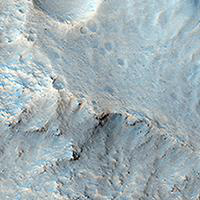

In [124]:
im

In [127]:
output_size = (50, 50)

im.thumbnail(output_size)

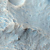

In [128]:
im

In [129]:
filename = '/home/ahoag/ML/mars/gallery_app/app/static/images/ESP_044088_2640_x200-400_y0-200.jpg'

In [132]:
os.path.basename(filename)

'ESP_044088_2640_x200-400_y0-200.jpg'

In [133]:
os.path.dirname(filename)

'/home/ahoag/ML/mars/gallery_app/app/static/images'

In [2]:
np.random.seed(42)

In [3]:
l1=list(range(20))
np.random.shuffle(l1)

In [145]:
l1

[0, 17, 15, 1, 8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]

In [147]:
l1

[19, 16, 15, 5, 4, 12, 14, 7, 3, 6, 2, 9, 13, 10, 18, 8, 17, 11, 0, 1]

In [4]:
l1

[0, 17, 15, 1, 8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]

In [6]:
s='1 February 2020'
dt = datetime.strptime(s,'%d %B %Y')
dt.strftime('%Y-%m-%d')

'2020-02-01'

In [8]:
import re
s='\n\t\tHiRISE Picture of the Day: 5 March 2021\xa0\nYesterday’s HiPOD\xa0\xa0•\xa0\xa0Archive\xa0\xa0'
re.search(r'Day:\s(.*?)\xa0', s).group(1)

'5 March 2021'

In [10]:
from numpy import array, float32
predictions_dict = {'/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y0-200.jpg': array([0.15351805, 0.8867371 ], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y200-400.jpg': array([0.547948 , 0.4299025], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y400-600.jpg': array([0.1480481, 0.8924098], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y0-200.jpg': array([0.05807012, 0.96070176], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y200-400.jpg': array([0.10921037, 0.92008984], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y400-600.jpg': array([0.20483288, 0.833408  ], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x400-600_y0-200.jpg': array([0.06851205, 0.9664571 ], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x400-600_y200-400.jpg': array([0.07612216, 0.95810694], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x400-600_y400-600.jpg': array([0.34553057, 0.72020894], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x600-800_y0-200.jpg': array([0.96490115, 0.02852991], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x600-800_y200-400.jpg': array([0.46255136, 0.55004025], dtype=float32), '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x600-800_y400-600.jpg': array([0.96140283, 0.03436276], dtype=float32)}

In [11]:
predictions_dict

{'/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y0-200.jpg': array([0.15351805, 0.8867371 ], dtype=float32),
 '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y200-400.jpg': array([0.547948 , 0.4299025], dtype=float32),
 '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x0-200_y400-600.jpg': array([0.1480481, 0.8924098], dtype=float32),
 '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y0-200.jpg': array([0.05807012, 0.96070176], dtype=float32),
 '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y200-400.jpg': array([0.10921037, 0.92008984], dtype=float32),
 '/home/ahoag/ML/mars/gallery_app/app/static/hipod/2021-03-06/chunked_images_200x200/ESP_039405_1575_x200-400_y400-600.jpg': array([0.20483288, 0.833